Haan, pehle hypothesis statements banate hain. Hypothesis testing mein sabse pehla step hota hai null hypothesis (
𝐻
0
H
0
​
 ) aur alternative hypothesis (
𝐻
1
H
1
​
 ) ko clearly define karna. Yeh dono hypothesis define karte hain ki hum kya test kar rahe hain aur kis conclusion pe pahunch sakte hain.

# **Example 1: Two-Tailed Test**
Hum check kar rahe hain ki kya sample ka mean population ke mean se different hai ya nahi. Hume nahi pata ki sample mean zyada hoga ya kam, isliye hum Two-Tailed Test use karenge.

Hypothesis for Two-Tailed Test:
Null Hypothesis (
𝐻
0
H
0
​
 ): Sample mean population mean ke barabar hai.

𝐻
0
:
𝜇
=
70
H
0
​
 :μ=70
Matlab, sample mean population mean se significantly different nahi hai.

Alternative Hypothesis (
𝐻
1
H
1
​
 ): Sample mean population mean se different hai (chahe zyada ya kam dono ho sakta hai).

𝐻
1
:
𝜇
≠
70
H
1
​
 :μ

=70
Matlab, sample mean population mean se significantly different hai.

# **Example 2: One-Tailed Test **(Right-Tailed)
Ab maan lo humara assumption yeh hai ki sample mean population mean se zyada hoga. Matlab, hum sirf ek side check karenge (greater than side). Isliye, yeh One-Tailed Test hoga.

Hypothesis for One-Tailed Test:
Null Hypothesis (
𝐻
0
H
0
​
 ): Sample mean population mean se bada nahi hai (ya barabar hai ya kam hai).

𝐻
0
:
𝜇
≤
70
H
0
​
 :μ≤70
Matlab, sample mean population mean se bada nahi hai.

Alternative Hypothesis (
𝐻
1
H
1
​
 ): Sample mean population mean se significantly bada hai.

𝐻
1
:
𝜇
>
70
H
1
​
 :μ>70
Matlab, sample mean population mean se bada hai.

Steps in Hypothesis Testing:
Null Hypothesis (
𝐻
0
H
0
​
 ): Yeh wo statement hai jise hum reject karne ki koshish karte hain. Generally, null hypothesis assume karta hai ki koi significant difference ya effect nahi hai.

Alternative Hypothesis (
𝐻
1
H
1
​
 ): Yeh wo statement hai jise hum tab accept karte hain jab null hypothesis reject ho jata hai. Alternative hypothesis ka matlab hota hai ki kuch significant difference ya effect hai.

Significance Level (α): Hum ek significance level define karte hain, jo humare test ka threshold hota hai. Commonly, α = 0.05 (5%) liya jata hai. Agar p-value is se kam hoti hai, toh hum null hypothesis ko reject karte hain.

Test Statistic and p-value: Z-test ya t-test ka use karke hum ek test statistic calculate karte hain, jisse hume p-value milti hai. p-value batati hai ki null hypothesis ke under aisa result milne ki probability kya hai.

Decision: Agar p-value chhoti hoti hai than our significance level (α), toh hum null hypothesis ko reject karte hain. Otherwise, we fail to reject it.

Ab hypothesis define hone ke baad, next step hai code ko execute karna. Let’s go ahead and implement the code for both One-Tailed and Two-Tailed Tests in the next step.

In [ ]:
import math
from scipy import stats


In [ ]:
#step1 1
mean = 170
std = 8
n = 100
confidenceL = 0.95

# step-2 Z-score
z_score = stats.norm.ppf((1+confidenceL)/2)

# step 3 calculate std error
std_error = std/math.sqrt(n)

# step 4 calculate margin of error
margin_of_error = z_score * std_error

# step 5: Calculate confidence interval
lower_bound = mean - margin_of_error
upper_bound = mean + margin_of_error

# step 6: Print the results
print(f"Sample Mean: {mean} cm")
print(f"Z-score for {confidenceL*100}% Confidence Level: {z_score}")
print(f"Standard Error: {std_error}")
print(f"Margin of Error: ±{margin_of_error:.2f} cm")
print(f"Confidence Interval: [{lower_bound:.2f} cm, {upper_bound:.2f} cm]")

Sample Mean: 170 cm
Z-score for 95.0% Confidence Level: 1.959963984540054
Standard Error: 0.8
Margin of Error: ±1.57 cm
Confidence Interval: [168.43 cm, 171.57 cm]


Example 1: Two-Tailed Test

In [ ]:
import scipy.stats as stats

# Given data
sample_mean = 73  # Sample mean
population_mean = 70  # Population mean
std_dev = 10  # Standard deviation of the population
sample_size = 30  # Number of samples
alpha = 0.05  # Significance level (5%)

z_score= (sample_mean - population_mean) / (std_dev/ (sample_size **0.5))
p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))

if p_value < alpha:
    print(f"Reject the null hypothesis (H0), p-value: {p_value:.4f}")
else:
    print(f"Fail to reject the null hypothesis (H0), p-value: {p_value:.4f}")

Fail to reject the null hypothesis (H0), p-value: 0.1003


# **Code for One-Tailed and Two-Tailed Tests:**

In [ ]:
!pip install numpy scipy matplotlib


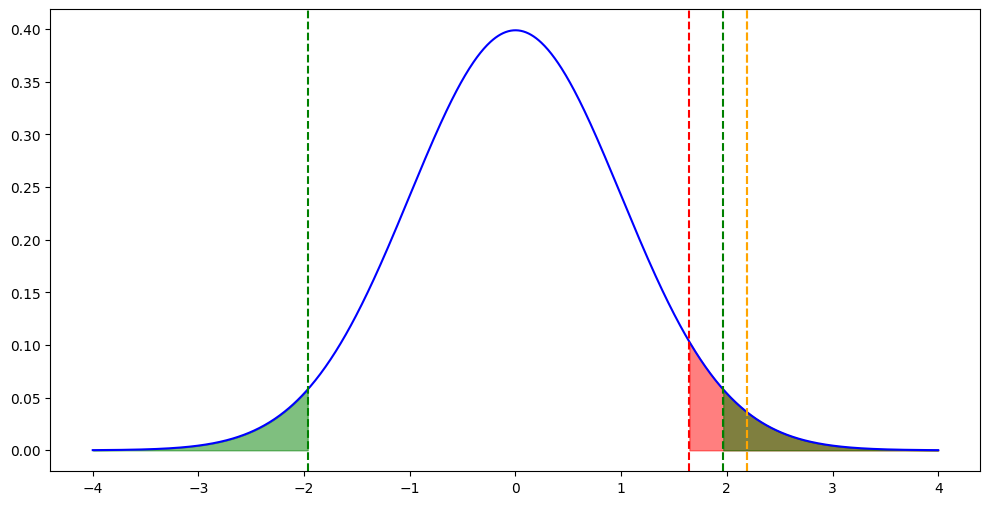

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

def plot_normal_distribution_and_tests(alpha, sample_mean, population_mean, population_std_dev, sample_size):
# Calculate Z-score for sample mean
  z_test_statistic = (sample_mean - population_mean) / (population_std_dev / np.sqrt(sample_size))

  # Critical Z-scores
  critical_z_one_tailed = stats.norm.ppf(1 - alpha)  # One-tailed test
  critical_z_two_tailed = stats.norm.ppf(1 - alpha / 2)  # Two-tailed test

  # Set up x values for the normal distribution curve
  x = np.linspace(-4, 4, 1000)
  y = stats.norm.pdf(x, 0, 1)

  # Create the plot
  plt.figure(figsize=(12, 6))


  # Plot the normal distribution
  plt.plot(x, y, label='Standard Normal Distribution', color='blue')

  # One-Tailed Test
  plt.fill_between(x, y, where=(x >= critical_z_one_tailed), color='red', alpha=0.5,
                     label='Critical Region (One-Tailed)')
  plt.axvline(x=critical_z_one_tailed, color='red', linestyle='--', label='Critical Z (One-Tailed)')

  # Two-Tailed Test
  plt.fill_between(x, y, where=(x <= -critical_z_two_tailed), color='green', alpha=0.5,
                     label='Critical Region (Two-Tailed Left)')
  plt.fill_between(x, y, where=(x >= critical_z_two_tailed), color='green', alpha=0.5,
                     label='Critical Region (Two-Tailed Right)')
  plt.axvline(x=-critical_z_two_tailed, color='green', linestyle='--', label='Critical Z (Two-Tailed Left)')
  plt.axvline(x=critical_z_two_tailed, color='green', linestyle='--', label='Critical Z (Two-Tailed Right)')

  # Plot the Z-test statistic
  plt.axvline(x=z_test_statistic, color='orange', linestyle='--', label='Z-Test Statistic')

  # Plot the Z-test statistic
  plt.axvline(x=z_test_statistic, color='orange', linestyle='--', label='Z-Test Statistic')

  # Parameters
alpha = 0.05  # Significance level
sample_mean = 1.2  # Sample mean
population_mean = 1.0  # Population mean
population_std_dev = 0.5  # Population standard deviation
sample_size = 30  # Sample size

plot_normal_distribution_and_tests(alpha, sample_mean, population_mean, population_std_dev, sample_size)
plt.show()